<a href="https://colab.research.google.com/github/guptankit005/Analytics/blob/master/Ensemble_Model_Bagging.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [9]:
#importing data from sklearn
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

#converting data into pandas dataframe
canc_data = pd.DataFrame(data.data, columns=data.feature_names)

#adding target field to the dataset
canc_data['target'] = pd.Series(data.target)

In [10]:
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [11]:
#printing first five rows of data
#canc_data.head()

#checking information about all the columns
#canc_data.info()

#checking basic statistical distribution of data
#canc_data.describe().transpose()

#checking for null values
#canc_data.isnull().sum()

#checking for duplicate rows
#canc_data.duplicated().sum()

#212 - Malignant, 357 - Benign
canc_data['target'].value_counts()
#value count to see if data is balanced or imbalanced.

1    357
0    212
Name: target, dtype: int64

In [12]:
#creating X and y
X_feature = list(canc_data.columns)
X_feature.remove('target')

X = canc_data[X_feature]
y = canc_data['target']

In [13]:
#splitting data for training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

# Random Forest

              precision    recall  f1-score   support

           0       0.97      0.91      0.94        69
           1       0.94      0.98      0.96       102

    accuracy                           0.95       171
   macro avg       0.96      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171

Accuracy score on test:  0.953
Accuracy score on train:  1.0
log_loss :  1.61587724411618
AUC Score :  0.993


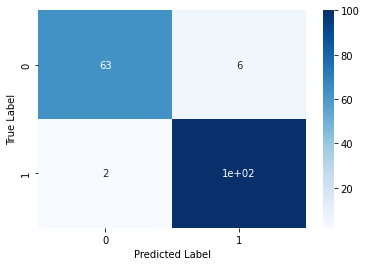

In [14]:
#importing Random Forest from sklearn
from sklearn.ensemble import RandomForestClassifier

random_clf = RandomForestClassifier(max_depth=10, n_estimators=50, n_jobs=1, random_state=4).fit(X_train, y_train)

#predicting for our test data
y_pred = random_clf.predict(X_test)
#generating classification report 
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

#importing libraries to check model performance
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
from sklearn import metrics

print("Accuracy score on test: " , round((random_clf.score(X_test, y_test)),3))
print("Accuracy score on train: ", round((random_clf.score(X_train, y_train)),3))

#printing log loss for the model
print('log_loss : ', log_loss(y_test, y_pred))



#let find ROC and AUC score
#before we calculate roc_auc_score(), we need to find out the predicted probabilityiies for test data.

pred_prob = pd.DataFrame(random_clf.predict_proba(X_test))

#we'll also add the actual label

test_result = pd.DataFrame( { 'actual' : y_test})
test_result = test_result.reset_index()

test_result['prob_0'] = pred_prob.iloc[:,0:1]
test_result['prob_1'] = pred_prob.iloc[:,1:2]

#to calculate ROC AUC score we will pass actual class labels and predicted probability 

auc_score = round(metrics.roc_auc_score(test_result.actual, test_result.prob_1),3)
print("AUC Score : ",auc_score)


#generating confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True, cmap='Blues')
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()


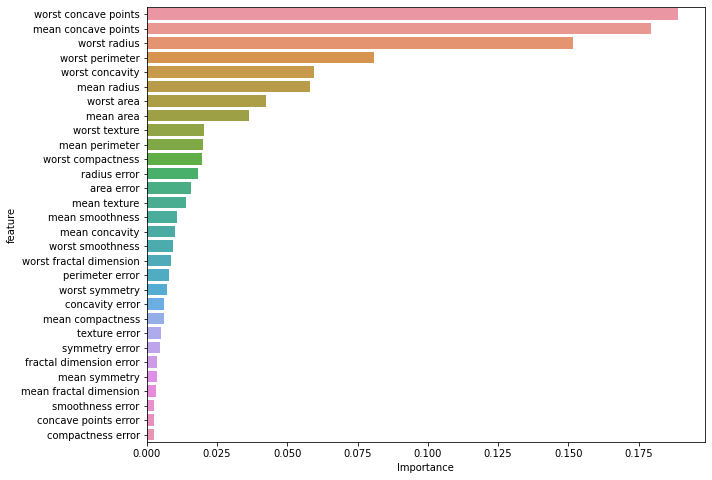

In [18]:
#creating a dataframe for feature and importance
feature_ranking = pd.DataFrame({'feature' : X_train.columns,
                                'Importance' : random_clf.feature_importances_}).sort_values('Importance', ascending = False)

plt.figure(figsize=(10,8))

sns.barplot(y = 'feature', x = 'Importance', data = feature_ranking)
plt.show()

# Bagging

              precision    recall  f1-score   support

           0       0.97      0.91      0.94        69
           1       0.94      0.98      0.96       102

    accuracy                           0.95       171
   macro avg       0.96      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171

Accuracy score on test:  0.959
Accuracy score on train:  1.0
log_loss :  1.61587724411618
AUC Score :  0.994


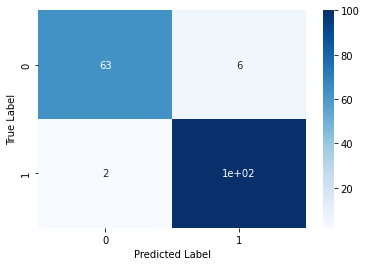

In [23]:
from sklearn import tree
clftree = tree.DecisionTreeClassifier()
from sklearn.ensemble import BaggingClassifier


bag_clf = BaggingClassifier(base_estimator = clftree, n_estimators = 500, bootstrap = True, n_jobs = 1, random_state = 42).fit(X_train, y_train)

#generating classification report 
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

#importing libraries to check model performance
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
from sklearn import metrics

print("Accuracy score on test: " , round((bag_clf.score(X_test, y_test)),3))
print("Accuracy score on train: ", round((bag_clf.score(X_train, y_train)),3))

#printing log loss for the model
print('log_loss : ', log_loss(y_test, y_pred))



#let find ROC and AUC score
#before we calculate roc_auc_score(), we need to find out the predicted probabilityiies for test data.

pred_prob = pd.DataFrame(bag_clf.predict_proba(X_test))

#we'll also add the actual label

test_result = pd.DataFrame( { 'actual' : y_test})
test_result = test_result.reset_index()

test_result['prob_0'] = pred_prob.iloc[:,0:1]
test_result['prob_1'] = pred_prob.iloc[:,1:2]

#to calculate ROC AUC score we will pass actual class labels and predicted probability 

auc_score = round(metrics.roc_auc_score(test_result.actual, test_result.prob_1),3)
print("AUC Score : ",auc_score)


#generating confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True, cmap='Blues')
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

